In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


In [2]:
excel = pd.read_csv('C:/Users/DELL/Desktop/This will be the first university folder (and has to be the only)/3rd year 1st half/Machine Learning/Machine Learning Final/Occupancy_Estimation.csv')

df = pd.DataFrame(excel)

df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second

C:\Users\DELL\AppData\Local\Temp\ipykernel_6840\977017317.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [5]:
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Year,Month,Day,Hour,Minute,Second
0,2017-12-22,2024-01-20 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.769231,0,0,1,2017,12,22,10,49,41
1,2017-12-22,2024-01-20 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.646154,0,0,1,2017,12,22,10,50,12
2,2017-12-22,2024-01-20 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.519231,0,0,1,2017,12,22,10,50,42
3,2017-12-22,2024-01-20 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.388462,0,0,1,2017,12,22,10,51,13
4,2017-12-22,2024-01-20 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.253846,0,0,1,2017,12,22,10,51,44


<Axes: xlabel='Hour', ylabel='Room_Occupancy_Count'>

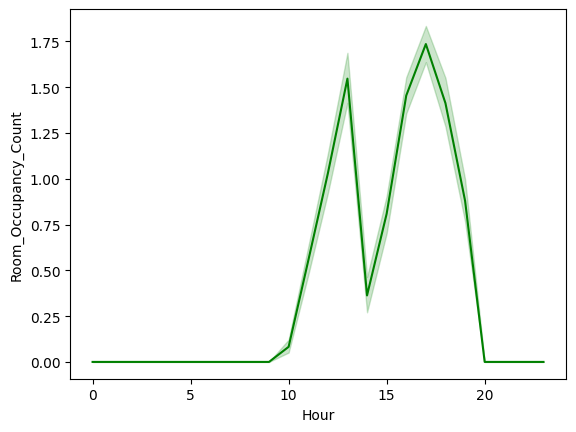

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Hour', y='Room_Occupancy_Count', data=df, color = 'green')


<Axes: xlabel='Day', ylabel='Room_Occupancy_Count'>

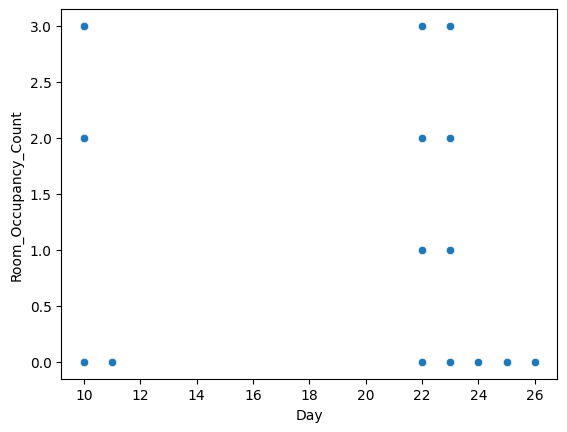

In [7]:
sns.scatterplot(x='Day',y='Room_Occupancy_Count', data=df)

<Axes: xlabel='S7_PIR', ylabel='count'>

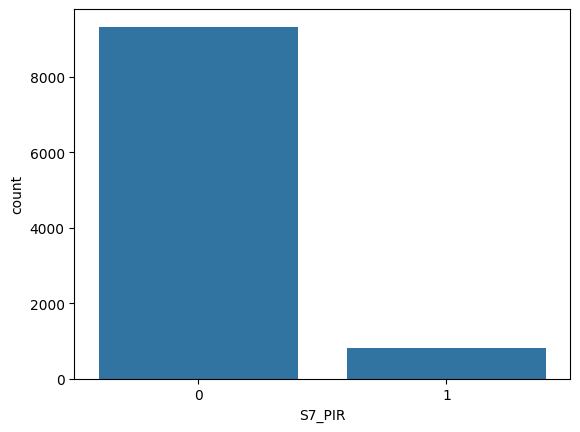

In [8]:
sns.countplot(x='S7_PIR', data=df)

<Axes: xlabel='S6_PIR', ylabel='count'>

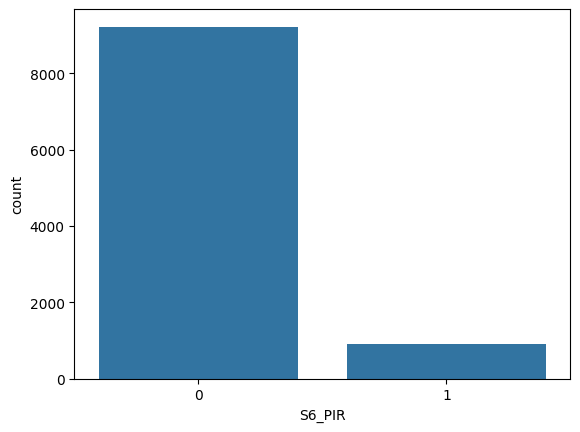

In [9]:
sns.countplot(x='S6_PIR', data=df)

<Axes: xlabel='Hour', ylabel='S6_PIR'>

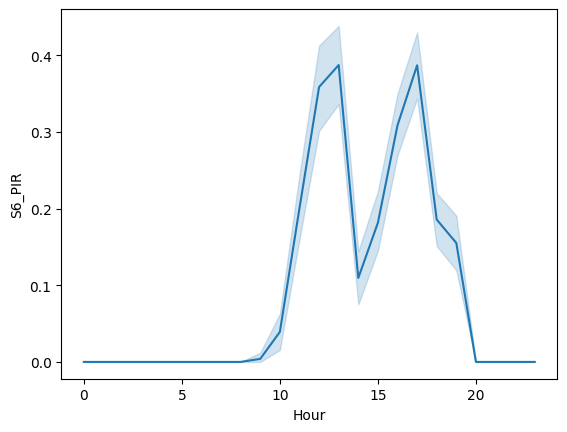

In [10]:
sns.lineplot(x='Hour', y='S6_PIR', data=df)

<Axes: >

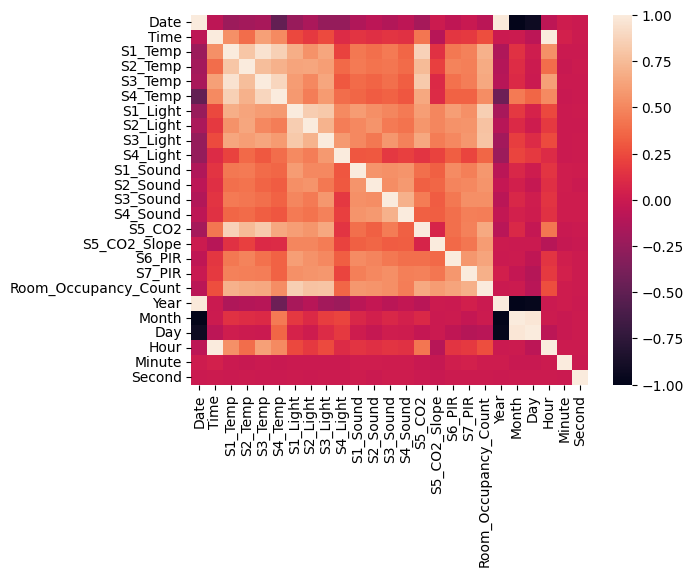

In [11]:
sns.heatmap(data=df.corr(
    
))

<Axes: xlabel='Room_Occupancy_Count', ylabel='count'>

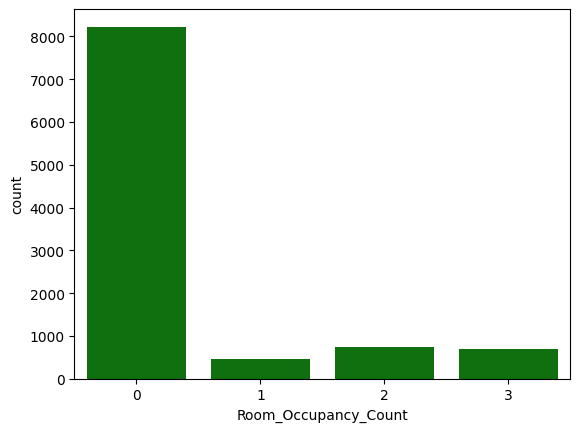

In [12]:
sns.countplot(x = 'Room_Occupancy_Count', data = df, color='green')

In [13]:
x = df.drop(['Date' , 'Time' , 'Room_Occupancy_Count'], axis = 1)
y = df['Room_Occupancy_Count']

SC = StandardScaler()
x = SC.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2, random_state = 42)

In [14]:
from collections import Counter
count = Counter

print(count(y_train))

smt = SMOTE()
x_train, y_train= smt.fit_resample(x_train, y_train)

print(count(y_train))

Counter({0: 6609, 2: 584, 3: 554, 1: 356})
Counter({0: 6609, 3: 6609, 1: 6609, 2: 6609})


In [66]:
rfc = RandomForestClassifier()

grid = {'n_estimators' : [100,150,200], 'max_depth' : [10,15,20], 'criterion' : ['gini' , 'entropy' , 'log_loss']}
search = GridSearchCV(rfc , grid, cv = 5)
search.fit(x_train, y_train)

best = search.best_params_
print(best)

{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}


In [67]:
new_grid = {'n_estimators': [200], 'max_depth': [15], 'criterion': ['entropy']}
search = GridSearchCV(rfc, new_grid, cv=10)
search.fit(x_train, y_train)

y_pred = search.predict(x_test)

acc = accuracy_score(y_test, y_pred)
rca = recall_score(y_test, y_pred, average='weighted')
prc = precision_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')

print('Accuracy score is: ', acc, '\nPrecision Score: ',prc,'\nRecall Score: ', rca, '\nF1 score: ',f1)

Accuracy score is:  0.9985192497532083 
Precision Score:  0.998520967628475 
Recall Score:  0.9985192497532083 
F1 score:  0.9985181778395725


In [68]:
svm = SVC()
grid = {'C': [0.1,0.3] , 'kernel': ['linear' , 'rbf' , 'poly'], 'degree':[2,3], 'gamma': [0.1,0.5]}
search = GridSearchCV(svm,grid,cv=10)
search.fit(x_train,y_train)

best = search.best_params_
print(best)

{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}


In [71]:
new_grid = {'C': [0.1], 'degree': [3], 'gamma': [0.1], 'kernel': ['poly']}
search = GridSearchCV(svm, new_grid, cv=10)
search.fit(x_train, y_train)

y_pred = search.predict(x_test)

acc = accuracy_score(y_test, y_pred)
rca = recall_score(y_test, y_pred, average='weighted')
prc = precision_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')

print('Accuracy score is: ', acc, '\nPrecision Score: ',prc,'\nRecall Score: ', rca, '\nF1 score: ',f1)

Accuracy score is:  0.9960513326752222 
Precision Score:  0.9960573914486895 
Recall Score:  0.9960513326752222 
F1 score:  0.9960515076455736


In [16]:
gradient = GradientBoostingClassifier()

grid = {'n_estimators': [100,150,200], 'learning_rate':[0.1,0.3], 'random_state':[42]}
search = GridSearchCV(gradient, grid, cv=5)
search.fit(x_train, y_train)

best = search.best_params_
print(best)

In [17]:
new_grid = {'learning_rate': [0.3], 'n_estimators': [200], 'random_state': [42]}
search = GridSearchCV(gradient, new_grid, cv=5)
search.fit(x_train, y_train)

y_pred = search.predict(x_test)

acc = accuracy_score(y_test, y_pred)
rca = recall_score(y_test, y_pred, average='weighted')
prc = precision_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')

print('Accuracy score is: ', acc, '\nPrecision Score: ',prc,'\nRecall Score: ', rca, '\nF1 score: ',f1)

Accuracy score is:  0.9990128331688055 
Precision Score:  0.9990175791631863 
Recall Score:  0.9990128331688055 
F1 score:  0.9990131408411855


In [18]:
xgb = XGBClassifier()

grid = {'n_estimators': [100,200,300], 'learning_rate':[0.1,0.5,1], 'random_state':[42]}
search = GridSearchCV(xgb, grid, cv=10)
search.fit(x_train, y_train)

best = search.best_params_
print(best)

{'learning_rate': 0.5, 'n_estimators': 200, 'random_state': 42}


In [19]:
new_grid = {'learning_rate': [0.1], 'n_estimators': [100], 'random_state': [42]}
search = GridSearchCV(xgb, new_grid, cv=10)
search.fit(x_train, y_train)

y_pred = search.predict(x_test)

acc = accuracy_score(y_test, y_pred)
rca = recall_score(y_test, y_pred, average='weighted')
prc = precision_score(y_test, y_pred, average='weighted')
f1  = f1_score(y_test, y_pred, average='weighted')

print('Accuracy score is: ', acc, '\nPrecision Score: ',prc,'\nRecall Score: ', rca, '\nF1 score: ',f1)

Accuracy score is:  0.9985192497532083 
Precision Score:  0.998520967628475 
Recall Score:  0.9985192497532083 
F1 score:  0.9985181778395725


In [ ]:
print('Thats it folks')